<img src="756594259921875.jpg" style = 'width:400px;height:200px'/>

## Использование Push-уведомлений для уменьшения оттока клиентов, на примере данных из магазина "H&M"

### Загрузка данных

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time 





%matplotlib inline 

In [2]:
dt = pd.read_csv('transactions_train.csv', encoding='windows-1251', sep=',')

In [3]:
dt

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [4]:
dt.drop(['sales_channel_id'], axis =1)

,t_dat,customer_id,article_id,price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932
...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763


> `t_dat` : Дата покупки  
> `customer_id` : id клиента <br>
> `article_id` : Aртикул приобретенного товара   
> `price`: Цена товара  
 


Добавим столбец со значением даты покупки в формате Unix: 

In [5]:
date_= []
for i in dt['t_dat']:
    date_2= time.mktime(datetime.datetime.strptime(i,"%Y-%m-%d").timetuple())
    date_.append(date_2)
dt['datetime'] = date_
dt

,t_dat,customer_id,article_id,price,sales_channel_id,datetime
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1.537384e+09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1.537384e+09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.537384e+09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.537384e+09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.537384e+09
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1.600715e+09
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1.600715e+09
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1.600715e+09
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1.600715e+09


### Проверка данных

#### Проверка на процент пропущенных данных

In [6]:
for col in dt.columns:
    pct_missing = np.mean(dt[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

t_dat - 0%
customer_id - 0%
article_id - 0%
price - 0%
sales_channel_id - 0%
datetime - 0%


Пропущенных данных не обнаружено

#### Проверка на выбросы признака 'price'

<AxesSubplot:>

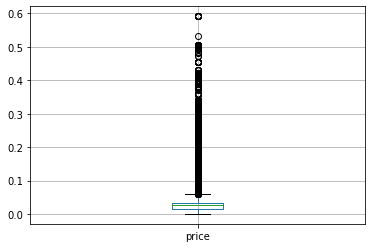

In [7]:
dt.boxplot(column=['price'])

[(0.05, 0.07)]

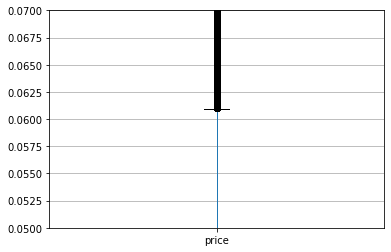

In [8]:
dt.boxplot(column=['price']).set(ylim=(0.05,0.07))


In [9]:
dt['price'].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

Очистка от выбросов:

In [10]:
a = dt['price'].quantile(0.75)
b = dt['price'].quantile(0.25)
IQR = a - b
up_line =  a + 1.5 * IQR #верхняя граница
und_line = b - 1.5 * IQR #нижняя граница


In [11]:
a

0.0338813559322033

In [12]:
b

0.0158135593220338

In [13]:
up_line

0.06098305084745756

In [14]:
und_line

-0.011288135593220453

In [15]:
dt = dt.query('price > @und_line and price < @up_line')
dt

,t_dat,customer_id,article_id,price,sales_channel_id,datetime
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1.537384e+09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1.537384e+09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.537384e+09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.537384e+09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.537384e+09
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1.600715e+09
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1.600715e+09
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1.600715e+09
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1.600715e+09


Проверка 'price':

<AxesSubplot:>

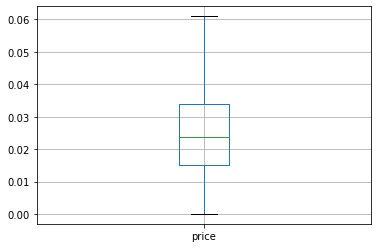

In [16]:
dt.boxplot(column=['price'])

<AxesSubplot:>

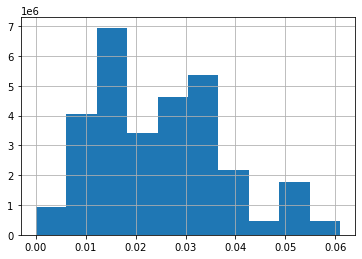

In [17]:
dt['price'].hist()

Отсеивание частных покупателей от постаматов и точек магазинов:

In [18]:
ds = pd.DataFrame(dt.groupby(['customer_id']).article_id.count()).reset_index()
ds

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,79
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
...,...,...
1338386,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,3
1338387,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,50
1338388,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,81
1338389,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,45


<AxesSubplot:>

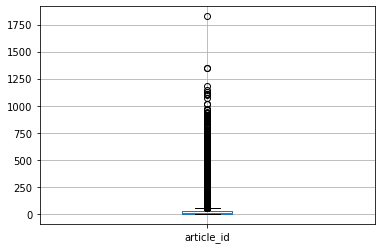

In [19]:
ds.boxplot(column=['article_id'])

[(0.0, 250.0)]

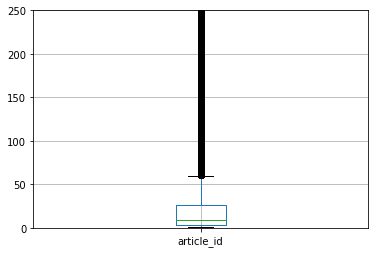

In [20]:
ds.boxplot(column=['article_id']).set(ylim=(0,250))

In [21]:
a_ds = ds['article_id'].quantile(0.75)
b_ds = ds['article_id'].quantile(0.25)
IQR_ds = a_ds - b_ds
up_line_ds =  a_ds + 1.5 * IQR_ds #верхняя граница
und_line_ds = b_ds - 1.5 * IQR_ds #нижняя граница

In [22]:
up_line_ds

60.5

In [23]:
und_line_ds

-31.5

In [24]:
ds = ds.query('article_id > @und_line_ds and article_id < @up_line_ds')
ds

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,3
...,...,...
1338385,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,8
1338386,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,3
1338387,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,50
1338389,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,45


Объединяем таблицы в исходную:

In [25]:
dt = dt.merge(ds, on = 'customer_id',how ='inner' )

In [26]:
dt

,t_dat,customer_id,article_id_x,price,sales_channel_id,datetime,article_id_y
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1.537384e+09,15
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1.537384e+09,15
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1.537729e+09,15
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,1.551380e+09,15
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,1.580670e+09,15
...,...,...,...,...,...,...,...
16348169,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,1.600715e+09,2
16348170,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,1.600715e+09,2
16348171,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,2,1.600715e+09,3
16348172,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,2,1.600715e+09,3


проверка на совпадение с ds:

In [27]:
dt.groupby('customer_id').article_id_x.count() 

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    21
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    15
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e     2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a    13
000064249685c11552da43ef22a5030f35a147f723d5b02ddd9fd22452b1f5a6     3
                                                                    ..
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef     8
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806     3
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831    50
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264    45
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a     7
Name: article_id_x, Length: 1214279, dtype: int64

In [28]:
dt = dt[['t_dat', 'customer_id', 'article_id_x', 'price','datetime']]

Итоговый датасет:

In [29]:
dt = dt.rename(columns={'article_id_x' :'article_id'})
dt

,t_dat,customer_id,article_id,price,datetime
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1.537384e+09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1.537384e+09
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1.537729e+09
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,1.551380e+09
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,1.580670e+09
...,...,...,...,...,...
16348169,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,1.600715e+09
16348170,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,1.600715e+09
16348171,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,1.600715e+09
16348172,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,1.600715e+09


# ______

### Основная часть

In [49]:
diff_date = dt.groupby('customer_id')['datetime'].apply(list).apply(np.diff).values

In [50]:
diff_date

array([array([       0.,        0., 10886400.,  1987200.,        0.,  5270400.,
                     0.,  4752000.,   864000.,        0.,  4752000.,   518400.,
                     0.,        0.,  9849600.,        0.,        0.,        0.,
                     0., 14515200.])                                           ,
       array([       0.,   345600., 13651200., 29289600.,        0.,        0.,
               6480000.,        0.,        0.,        0.,        0.,        0.,
                     0.,        0.])                                           ,
       array([0.]), ...,
       array([       0.,        0.,        0.,        0.,        0.,        0.,
                     0.,        0.,        0.,        0.,        0.,        0.,
                     0.,        0.,        0.,        0.,  1296000.,  3283200.,
                     0.,        0.,        0., 15811200.,   777600.,        0.,
               9072000.,        0.,  2160000.,        0.,        0.,        0.,
             

In [51]:
diff_date = pd.Series(np.concatenate(diff_date, axis =0))

In [52]:
diff_date

0                  0.0
1                  0.0
2           10886400.0
3            1987200.0
4                  0.0
               ...    
15133890           0.0
15133891      345600.0
15133892           0.0
15133893     1382400.0
15133894     5011200.0
Length: 15133895, dtype: float64

In [32]:
diff_date = diff_date / 86400 # перевод в сутки
diff_date

0             0.0
1             0.0
2           126.0
3            23.0
4             0.0
            ...  
15133890      0.0
15133891      4.0
15133892      0.0
15133893     16.0
15133894     58.0
Length: 15133895, dtype: float64

<AxesSubplot:>

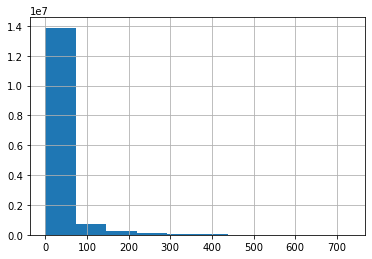

In [33]:
diff_date.hist()

In [34]:
buy = pd.DataFrame({
'persons': ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'],
'day':[diff_date.quantile(0.1),
         diff_date.quantile(0.2),
         diff_date.quantile(0.3),
         diff_date.quantile(0.4),
         diff_date.quantile(0.5),
         diff_date.quantile(0.6),
         diff_date.quantile(0.7),
         diff_date.quantile(0.8),
         diff_date.quantile(0.9),
         diff_date.quantile(1)]})



In [35]:
buy

,persons,day
0,10%,0.0
1,20%,0.0
2,30%,0.0
3,40%,0.0
4,50%,0.0
5,60%,0.0
6,70%,0.0
7,80%,15.0
8,90%,59.0
9,100%,731.0


### Вывод:

#### 80% покупателей совершают повторную покупку в течении около 2х недель (15 дней) с момента последней покупки.


#### Еще 10 % покупателей предпочитает совершать новую покупку с частотой примерно раз в 2 месяца (59 дней).

#### И еще 10% можем считать за "потерявшихся" покупатетлей, так как они совершают покупку всего раз в 2 года (731 день).

#### Что бы подобные клиенты делали покупки чаще воспользуемся Push-уведомлением о скидках, акциях и расспродажах. Отправлять его покупателю будет резонно на 59 день "без покупки", что бы не оповещать зря более лояльных клиентов. 